This project aims to analyse a banking telemarketing dataset and establish some information regarding the main telemarketing indicators only. Such as:

1. Average Handling Time (AHT)
2. Number of Successful calls (NS)
3. Contact Time (CT)
4. Volume
   

The tools used for this project are going to be Python, Pandas, Numpy and Matplotlib.

The database used in this project is of public use and can be found here: https://archive.ics.uci.edu/dataset/222/bank+marketing

In [21]:
# For starters, I shall load the Python libraries used in the project

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
# Now, I shall import the cvs database

telemarketing_database = pd.read_csv(r'C:\Users\Gustavo\Desktop\Data Analysis\File Types\CSV Files\Telemarketing project\bank\bank.csv',delimiter=';')
tmdb = telemarketing_database

In [23]:
tmdb

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [24]:
# I will now check for duplicates
tmdb.duplicated().value_counts()

False    4521
Name: count, dtype: int64

With the count of 4521 rows of False values, this tells us that we have no duplicated values in the entire dataset.

In [25]:
# With no duplicates, we can determine the Volume right away by checking the total number of rows.
tmdb.shape[0]

4521

In [26]:
# Now, we will calculate the mean time of the calls. (The values are in SECONDS)

avg_call_duration = tmdb['duration'].mean().round(2) #This calculates the average amount of seconds per call
max_call_duration = tmdb['duration'].max() # this will show the shortest call
min_call_duration = tmdb['duration'].min() # this will show the longest call

In [27]:
print(avg_call_duration)
print(max_call_duration)
print(min_call_duration)

# We discover from this that the average call times were around 264 seconds. The longest call was 3025 seconds, while the shortest, 4 seconds.

263.96
3025
4


Text(1.1, 3025, 'Maximum')

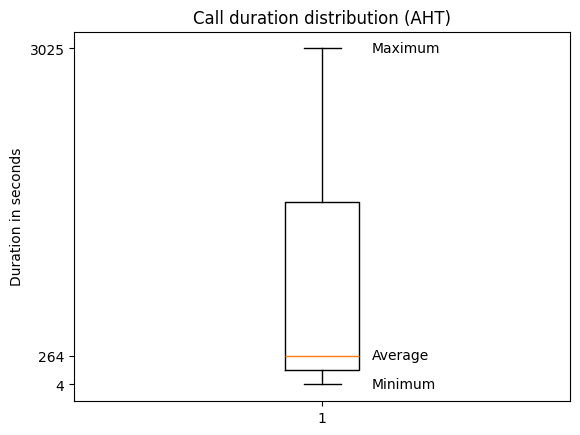

In [28]:
# With this data, we can extract the AHT (Average Handling Time).

data = [avg_call_duration, min_call_duration, max_call_duration]
plt.boxplot(data,vert=True)
plt.ylabel('Duration in seconds')
plt.title('Call duration distribution (AHT)')
plt.yticks(data)
plt.text(x=1.1,y=avg_call_duration,s='Average',color='black',verticalalignment='center')
plt.text(x=1.1,y=min_call_duration,s='Minimum',color='black',verticalalignment='center')
plt.text(x=1.1,y=max_call_duration,s='Maximum',color='black',verticalalignment='center')

# The following box plot shows the distribution of calls.


Text(0.5, 1.0, 'Call duration distribution')

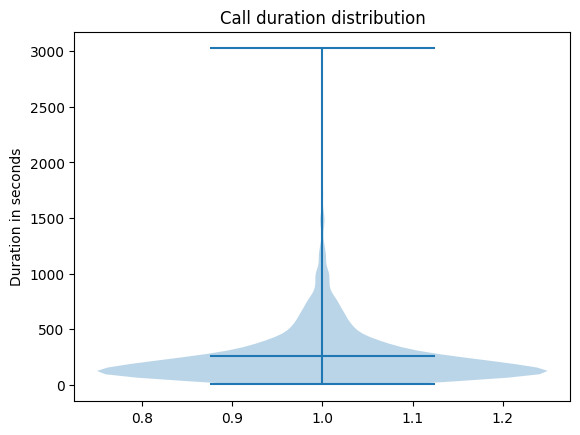

In [29]:
Duration =tmdb.duration
data = Duration
plt.violinplot(data,vert=True,showmeans=True,showextrema=True)
plt.ylabel('Duration in seconds')
plt.title('Call duration distribution')

# With this violin plot, we can have more information of all calls, note how the bottom part is wider than the upper part. 
# This is the concentration of the duration of the calls, therefore, most are shorter than 500 seconds, or 8 minutes.

In [30]:
# Now, on to calculate the NS (Number of Successes) indicator.

NS_Success = tmdb.y
Yes =(NS_Success.where(NS_Success == 'yes').count())
No =(NS_Success.where(NS_Success == 'no').count())

In [31]:
labels = Yes, No
sizes =[Yes, No]

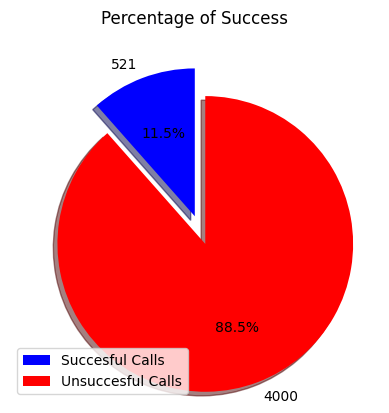

In [32]:
plt.pie(sizes,labels=labels,startangle=90,shadow=True,autopct='%1.1f%%',explode=(0,0.2),colors=('blue','red'))
plt.legend(['Succesful Calls', 'Unsuccesful Calls'],loc='lower left')
plt.title('Percentage of Success')
plt.show()


In [33]:
# Finally, let's analyze the contact times (CT)
CT_Day_Y = tmdb.value_counts('day').sort_index()
CT_Day_X = CT_Day_Y.index

Text(0.5, 1.0, 'CT - Days')

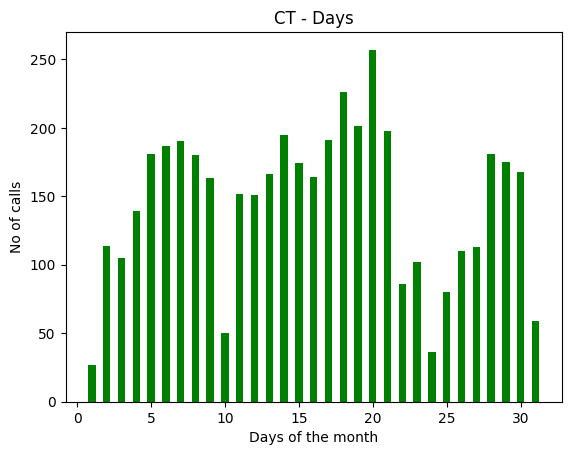

In [34]:
plt.bar(CT_Day_X,CT_Day_Y,width=0.5,color='green')
plt.xlabel('Days of the month')
plt.ylabel('No of calls')
plt.title('CT - Days')

In [35]:
Months = ['jan','feb','mar','apr','may','jun','jul','ago','sep','oct','nov','dec']

tmdb['month'] = pd.Categorical(tmdb['month'], categories= Months, ordered=True)

CT_Month_X = tmdb['month'].value_counts().sort_index()

CT_Month_Y = CT_Month_X.index

Text(0.5, 1.0, 'CT - Months')

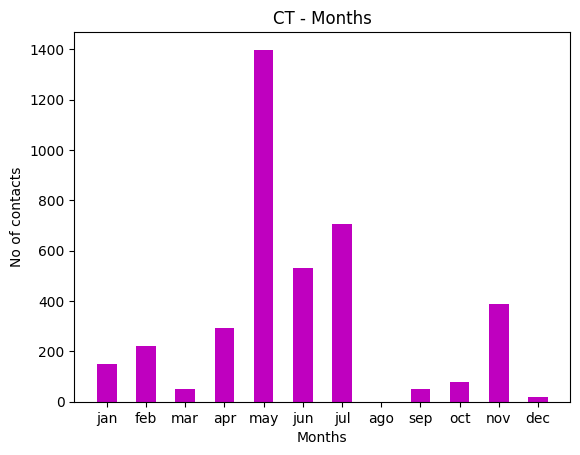

In [36]:
plt.bar(CT_Month_Y,CT_Month_X,width=0.5,color='m')
plt.xlabel('Months')
plt.ylabel('No of contacts')
plt.title('CT - Months')